# MarTech Challenge点击反欺诈预测

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pylab as plt

## 数据集

In [2]:
import os

In [3]:
data_path = './data'
train_data_path = os.path.join(data_path, 'train.csv')
test_data_path = os.path.join(data_path, 'test1.csv')

In [4]:
raw_train_df = pd.read_csv(train_data_path)
raw_test_df = pd.read_csv(test_data_path)

In [5]:
raw_train_df.head()

,Unnamed: 0,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,...,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,0,316361,1199,46000.0,0.0,0.0,0.0,1,NaN,104,...,android,9,18,1438873,1.559893e+12,8,2135019403,0,2329670524,601
1,1,135939,893,0.0,0.0,0.0,0.0,1,NaN,19,...,android,8.1,0,1185582,1.559994e+12,4,2782306428,1,2864801071,1000
2,2,399254,821,0.0,760.0,0.0,360.0,1,NaN,559,...,android,8.1.0,0,1555716,1.559837e+12,0,1392806005,2,628911675,696
3,3,68983,1004,46000.0,2214.0,0.0,1080.0,0,NaN,129,...,android,8.1.0,0,1093419,1.560042e+12,0,3562553457,3,1283809327,753
4,4,288999,1076,46000.0,2280.0,0.0,1080.0,1,zh-CN,64,...,android,8.0.0,0,1400089,1.559867e+12,5,2364522023,4,1510695983,582


合并训练和测试数据集

In [6]:
raw_test_df['label'] = -1
raw_df = pd.concat([raw_train_df, raw_test_df])

In [7]:
raw_df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
raw_df.reset_index(drop=True, inplace=True)

In [9]:
raw_df

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,316361,1199,46000.0,0.0,0.0,0.0,1,NaN,104,6.0,android,9,18,1438873,1.559893e+12,8,2135019403,0,2329670524,601
1,135939,893,0.0,0.0,0.0,0.0,1,NaN,19,6.0,android,8.1,0,1185582,1.559994e+12,4,2782306428,1,2864801071,1000
2,399254,821,0.0,760.0,0.0,360.0,1,NaN,559,0.0,android,8.1.0,0,1555716,1.559837e+12,0,1392806005,2,628911675,696
3,68983,1004,46000.0,2214.0,0.0,1080.0,0,NaN,129,2.0,android,8.1.0,0,1093419,1.560042e+12,0,3562553457,3,1283809327,753
4,288999,1076,46000.0,2280.0,0.0,1080.0,1,zh-CN,64,2.0,android,8.0.0,0,1400089,1.559867e+12,5,2364522023,4,1510695983,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649995,0,1001,46000.0,760.0,0.0,360.0,-1,zh-CN,29,2.0,Android,8.1.0,4,1165373,1.559957e+12,0,3162887451,126,2711576615,411
649996,0,1001,46000.0,780.0,0.0,360.0,-1,zh-CN,29,2.0,Android,9.0.0,4,1444115,1.559863e+12,0,97238959,322,2678022183,411
649997,0,1001,46000.0,780.0,0.0,360.0,-1,zh-CN,29,5.0,Android,8.1.0,4,1134378,1.560041e+12,0,1320118495,46,2610913319,411
649998,500925,1052,46000.0,854.0,240.0,480.0,-1,zh-CN,249,6.0,android,4.4.2,0,1700238,1.559688e+12,2,1292986591,41,1898209327,430


## 数据可视化分析

In [10]:
df = raw_df.copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650000 entries, 0 to 649999
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   android_id  650000 non-null  int64  
 1   apptype     650000 non-null  int64  
 2   carrier     650000 non-null  float64
 3   dev_height  650000 non-null  float64
 4   dev_ppi     650000 non-null  float64
 5   dev_width   650000 non-null  float64
 6   label       650000 non-null  int64  
 7   lan         411173 non-null  object 
 8   media_id    650000 non-null  int64  
 9   ntt         650000 non-null  float64
 10  os          650000 non-null  object 
 11  osv         641447 non-null  object 
 12  package     650000 non-null  int64  
 13  sid         650000 non-null  int64  
 14  timestamp   650000 non-null  float64
 15  version     650000 non-null  object 
 16  fea_hash    650000 non-null  object 
 17  location    650000 non-null  int64  
 18  fea1_hash   650000 non-null  int64  
 19  cu

* 包含类别特征和数值特征
* `lan`和`osv`存在数据缺失

### 原始特征

In [12]:
df.head().T

,0,1,2,3,4
android_id,316361,135939,399254,68983,288999
apptype,1199,893,821,1004,1076
carrier,46000,0,0,46000,46000
dev_height,0,0,760,2214,2280
dev_ppi,0,0,0,0,0
dev_width,0,0,360,1080,1080
label,1,1,1,0,1
lan,NaN,NaN,NaN,NaN,zh-CN
media_id,104,19,559,129,64
ntt,6,6,0,2,2


|字段|类型|说明|
|---|----|---|
|sid |string |样本id/请求会话sid|
|package |string |媒体信息，包名（已加密）|
|version |string |媒体信息，app版本|
|android_id |string |媒体信息，对外广告位ID（已加密）|
|media_id |string |媒体信息，对外媒体ID（已加密）|
|apptype |int |媒体信息，app所属分类|
|timestamp |bigint |请求到达服务时间，单位ms|
|location |int |用户地理位置编码（精确到城市）|
|fea_hash |int |用户特征编码（具体物理含义略去）|
|fea1_hash |int |用户特征编码（具体物理含义略去）|
|cus_type |int |用户特征编码（具体物理含义略去）|
|ntt |int |网络类型 0-未知, 1-有线网, 2-WIFI, 3-蜂窝网络未知, 4-2G, 5-3G, 6–4G|
|carrier |string |设备使用的运营商 0-未知, 46000-移动, 46001-联通, 46003-电信|
|os |string |操作系统，默认为android|
|osv |string |操作系统版本|
|lan |string |设备采用的语言，默认为中文|
|dev_height |int |设备高|
|dev_width |int |设备宽|
|dev_ppi |int |屏幕分辨率|

#### 用户信息

* `fea_hash` 用户特征
* `fea1_hash` 用户特征
* `cus_type` 用户特征

In [13]:
df['fea_hash'].value_counts()

68083895      144
235856055     128
51306679      127
2815114810     91
16777343       88
             ... 
1385758877      1
1792332918      1
4289815263      1
1524426360      1
1432122548      1
Name: fea_hash, Length: 509473, dtype: int64

In [14]:
df['fea1_hash'].value_counts()

4190764663    37119
2329670524    32366
876774520     18956
131824507     15314
2661244967    13218
              ...  
3416997412        1
1234810485        1
762267185         1
3849434997        1
4267083893        1
Name: fea1_hash, Length: 6147, dtype: int64

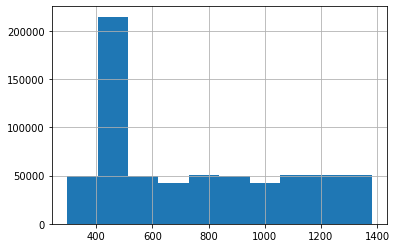

In [15]:
df['cus_type'].hist()

#### 媒体信息

* `package` 媒体信息，包名
* `version` 媒体信息， app版本
* `andriod_id` 媒体信息，对外广告ID
* `media_id` 媒体信息，对外媒体ID
* `apptype` 媒体信息，app所属分类

In [16]:
df['package'].value_counts()

0       171090
4       117637
9        48358
18       29017
14       28656
         ...  
1287         1
1799         1
2313         1
2149         1
2047         1
Name: package, Length: 2102, dtype: int64

In [17]:
df['version'].value_counts()

0            380269
5             73459
8             49758
4             31535
3             31017
7             29632
2             16483
1             11906
11            11578
6             10990
V3             1060
9              1031
v1              799
10              162
P_Final_6       119
V6              111
GA3              45
GA2              14
15               12
V2               10
 2                7
50                2
20                1
Name: version, dtype: int64

In [18]:
df['media_id'].value_counts()

29      122166
64       52135
54       48358
39       47605
104      28952
         ...  
1434         1
1439         1
1444         1
959          1
1534         1
Name: media_id, Length: 292, dtype: int64

In [19]:
df['apptype'].value_counts()

1001    131625
1106     61077
1076     52146
761      51520
1052     47307
         ...  
911          1
989          1
1046         1
857          1
1031         1
Name: apptype, Length: 89, dtype: int64

#### 位置&时间

用户地理位置编码（精确到城市）

In [20]:
df['location'].value_counts()

48     19428
21     16552
0      15158
36     12272
6      11703
       ...  
326       49
327       40
329       21
295       20
330        8
Name: location, Length: 332, dtype: int64

 请求到达服务时间，单位ms

In [21]:
df['timestamp'][0]

1559892728241.7212

In [22]:
import time
import datetime

In [23]:
time.gmtime(df['timestamp'][0]/1000)

time.struct_time(tm_year=2019, tm_mon=6, tm_mday=7, tm_hour=7, tm_min=32, tm_sec=8, tm_wday=4, tm_yday=158, tm_isdst=0)

In [24]:
print(datetime.datetime.fromtimestamp(df['timestamp'][0]/1000))

2019-06-07 15:32:08.241721


#### 设备信息

* `dev_height` 设备高度
* `dev_width` 设备宽度
* `dev_ppi` 屏幕分辨率
* `lan` 语言
* `os` 操作系统
* `osv` 操作系统版本

In [25]:
df['os'].value_counts()

android    394292
Android    255708
Name: os, dtype: int64

操作系统全部为android，该特征可是删除

In [26]:
df['osv'].value_counts()

8.1.0                              196643
9                                   92792
6.0.1                               41197
7.1.1                               34601
9.0.0                               31781
                                    ...  
5.0.3                                   1
Android_3.2.0-FL2-20180726.9015         1
9.1.0                                   1
Android_4.0.4                           1
7920                                    1
Name: osv, Length: 164, dtype: int64

In [27]:
df['lan'].value_counts()

zh-CN          317520
zh              39668
cn              26821
zh_CN           14993
Zh-CN           10552
zh-cn             807
ZH                245
CN                214
tw                147
en                115
zh_CN_#Hans        37
ko                 17
zh-TW              12
en-US               5
zh-HK               5
en-GB               3
TW                  3
ja                  2
it                  2
zh-MO               1
in_ID               1
zh-US               1
en_US               1
mi                  1
Name: lan, dtype: int64

In [28]:
df[(df.lan=='zh-HK') & (df.label!=-1)]['label']

33055     0
64931     0
456769    0
Name: label, dtype: int64

In [29]:
df[df.label!=-1][['dev_height','dev_width', 'dev_ppi', 'label']]

,dev_height,dev_width,dev_ppi,label
0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,1
2,760.0,360.0,0.0,1
3,2214.0,1080.0,0.0,0
4,2280.0,1080.0,0.0,1
...,...,...,...,...
499995,1920.0,1080.0,3.0,1
499996,1424.0,720.0,0.0,0
499997,1280.0,720.0,0.0,0
499998,960.0,540.0,0.0,0


In [30]:
df[(df.label!=-1) & (df.dev_height==0)]['label'].value_counts()

0    77284
1    29730
Name: label, dtype: int64

#### 运营商&网络类型

设备使用的运营商 0-未知, 46000-移动, 46001-联通, 46003-电信

In [31]:
df['carrier'].value_counts()

 46000.0    467100
 46001.0     56473
 0.0         52812
 46003.0     42001
-1.0         31614
Name: carrier, dtype: int64

0-未知, 1-有线网, 2-WIFI, 3-蜂窝网络未知, 4-2G, 5-3G, 6–4G

In [32]:
df['ntt'].value_counts()

2.0    414135
6.0    151423
5.0     45542
0.0     26799
3.0      5929
4.0      5792
7.0       378
1.0         2
Name: ntt, dtype: int64

网络类型分布

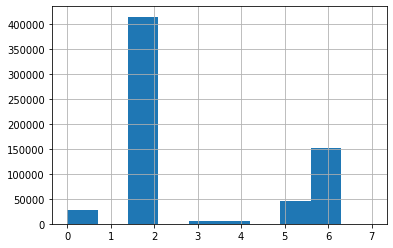

In [33]:
df['ntt'].hist()

## 数据预处理和特征工程

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650000 entries, 0 to 649999
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   android_id  650000 non-null  int64  
 1   apptype     650000 non-null  int64  
 2   carrier     650000 non-null  float64
 3   dev_height  650000 non-null  float64
 4   dev_ppi     650000 non-null  float64
 5   dev_width   650000 non-null  float64
 6   label       650000 non-null  int64  
 7   lan         411173 non-null  object 
 8   media_id    650000 non-null  int64  
 9   ntt         650000 non-null  float64
 10  os          650000 non-null  object 
 11  osv         641447 non-null  object 
 12  package     650000 non-null  int64  
 13  sid         650000 non-null  int64  
 14  timestamp   650000 non-null  float64
 15  version     650000 non-null  object 
 16  fea_hash    650000 non-null  object 
 17  location    650000 non-null  int64  
 18  fea1_hash   650000 non-null  int64  
 19  cu

### 缺失数据处理

In [75]:
df['lan'].fillna(df['lan'].value_counts().index[0], inplace=True)
df['osv'].fillna(df['osv'].value_counts().index[0], inplace=True)

In [76]:
user_feats = ['fea_hash', 'fea1_hash', 'cus_type']
media_fets = ['package', 'version', 'android_id', 'media_id', 'apptype']
dev_feats = ['dev_width', 'dev_height', 'dev_ppi', 'lan', 'osv']
telecom_feats = ['carrier', 'ntt']

features = user_feats + media_fets + dev_feats + telecom_feats
cat_features = ['lan', 'osv', 'version', 'fea_hash']

### 构建训练数据集

In [78]:
train_df = df[df.label!=-1]
test_df = df[df.label==-1]

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_val, y_train, y_val = train_test_split(train_df[features], train_df['label'],
                                                  test_size=0.2,random_state=42)
X_test = test_df[features]

In [81]:
print('Train dataset X: %s y:%s' % (X_train.shape, y_train.shape))
print('Test  dataset X:', X_test.shape)

Train dataset X: (400000, 15) y:(400000,)
Test  dataset X: (150000, 15)


## 模型、评估和预测

In [82]:
import catboost

model = catboost.CatBoostClassifier()
model.fit(X_train, y_train, cat_features=cat_features)

Learning rate set to 0.13305
0:	learn: 0.6084131	total: 379ms	remaining: 6m 18s
1:	learn: 0.5481159	total: 655ms	remaining: 5m 26s
2:	learn: 0.5038390	total: 783ms	remaining: 4m 20s
3:	learn: 0.4730101	total: 921ms	remaining: 3m 49s
4:	learn: 0.4514070	total: 1.05s	remaining: 3m 28s
5:	learn: 0.4342297	total: 1.26s	remaining: 3m 29s
6:	learn: 0.4218651	total: 1.36s	remaining: 3m 13s
7:	learn: 0.4119942	total: 1.49s	remaining: 3m 4s
8:	learn: 0.4043872	total: 1.61s	remaining: 2m 57s
9:	learn: 0.3971943	total: 1.81s	remaining: 2m 59s
10:	learn: 0.3912654	total: 1.98s	remaining: 2m 57s
11:	learn: 0.3869689	total: 2.15s	remaining: 2m 57s
12:	learn: 0.3834029	total: 2.33s	remaining: 2m 56s
13:	learn: 0.3805285	total: 2.49s	remaining: 2m 55s
14:	learn: 0.3767748	total: 2.73s	remaining: 2m 59s
15:	learn: 0.3735407	total: 2.95s	remaining: 3m 1s
16:	learn: 0.3707784	total: 3.19s	remaining: 3m 4s
17:	learn: 0.3684926	total: 3.4s	remaining: 3m 5s
18:	learn: 0.3655521	total: 3.64s	remaining: 3m 7s

159:	learn: 0.3098392	total: 33.8s	remaining: 2m 57s
160:	learn: 0.3097604	total: 34s	remaining: 2m 57s
161:	learn: 0.3096404	total: 34.2s	remaining: 2m 57s
162:	learn: 0.3094711	total: 34.4s	remaining: 2m 56s
163:	learn: 0.3094252	total: 34.7s	remaining: 2m 56s
164:	learn: 0.3093397	total: 34.9s	remaining: 2m 56s
165:	learn: 0.3092679	total: 35.1s	remaining: 2m 56s
166:	learn: 0.3090958	total: 35.3s	remaining: 2m 56s
167:	learn: 0.3090065	total: 35.5s	remaining: 2m 55s
168:	learn: 0.3089262	total: 35.8s	remaining: 2m 55s
169:	learn: 0.3088634	total: 36s	remaining: 2m 55s
170:	learn: 0.3087279	total: 36.2s	remaining: 2m 55s
171:	learn: 0.3085280	total: 36.5s	remaining: 2m 55s
172:	learn: 0.3083656	total: 36.7s	remaining: 2m 55s
173:	learn: 0.3082895	total: 36.9s	remaining: 2m 55s
174:	learn: 0.3081159	total: 37.2s	remaining: 2m 55s
175:	learn: 0.3080320	total: 37.5s	remaining: 2m 55s
176:	learn: 0.3078904	total: 37.7s	remaining: 2m 55s
177:	learn: 0.3077887	total: 37.9s	remaining: 2m 5

315:	learn: 0.2986380	total: 1m 9s	remaining: 2m 29s
316:	learn: 0.2985966	total: 1m 9s	remaining: 2m 29s
317:	learn: 0.2985691	total: 1m 9s	remaining: 2m 29s
318:	learn: 0.2985320	total: 1m 9s	remaining: 2m 29s
319:	learn: 0.2984647	total: 1m 10s	remaining: 2m 29s
320:	learn: 0.2984370	total: 1m 10s	remaining: 2m 28s
321:	learn: 0.2984067	total: 1m 10s	remaining: 2m 28s
322:	learn: 0.2983508	total: 1m 11s	remaining: 2m 28s
323:	learn: 0.2983363	total: 1m 11s	remaining: 2m 28s
324:	learn: 0.2982915	total: 1m 11s	remaining: 2m 28s
325:	learn: 0.2982636	total: 1m 11s	remaining: 2m 28s
326:	learn: 0.2982192	total: 1m 12s	remaining: 2m 28s
327:	learn: 0.2981782	total: 1m 12s	remaining: 2m 27s
328:	learn: 0.2981614	total: 1m 12s	remaining: 2m 27s
329:	learn: 0.2980945	total: 1m 12s	remaining: 2m 27s
330:	learn: 0.2980669	total: 1m 12s	remaining: 2m 27s
331:	learn: 0.2980268	total: 1m 13s	remaining: 2m 27s
332:	learn: 0.2980090	total: 1m 13s	remaining: 2m 26s
333:	learn: 0.2979728	total: 1m 

468:	learn: 0.2934554	total: 1m 43s	remaining: 1m 57s
469:	learn: 0.2934331	total: 1m 44s	remaining: 1m 57s
470:	learn: 0.2933969	total: 1m 44s	remaining: 1m 57s
471:	learn: 0.2933421	total: 1m 44s	remaining: 1m 57s
472:	learn: 0.2933162	total: 1m 44s	remaining: 1m 56s
473:	learn: 0.2932943	total: 1m 45s	remaining: 1m 56s
474:	learn: 0.2932696	total: 1m 45s	remaining: 1m 56s
475:	learn: 0.2932537	total: 1m 45s	remaining: 1m 56s
476:	learn: 0.2932462	total: 1m 45s	remaining: 1m 56s
477:	learn: 0.2932298	total: 1m 46s	remaining: 1m 55s
478:	learn: 0.2932260	total: 1m 46s	remaining: 1m 55s
479:	learn: 0.2932109	total: 1m 46s	remaining: 1m 55s
480:	learn: 0.2932059	total: 1m 46s	remaining: 1m 55s
481:	learn: 0.2931969	total: 1m 47s	remaining: 1m 55s
482:	learn: 0.2931866	total: 1m 47s	remaining: 1m 54s
483:	learn: 0.2931661	total: 1m 47s	remaining: 1m 54s
484:	learn: 0.2931402	total: 1m 47s	remaining: 1m 54s
485:	learn: 0.2931345	total: 1m 47s	remaining: 1m 54s
486:	learn: 0.2931256	total:

621:	learn: 0.2900204	total: 2m 18s	remaining: 1m 24s
622:	learn: 0.2900133	total: 2m 18s	remaining: 1m 24s
623:	learn: 0.2899958	total: 2m 19s	remaining: 1m 23s
624:	learn: 0.2899835	total: 2m 19s	remaining: 1m 23s
625:	learn: 0.2899677	total: 2m 19s	remaining: 1m 23s
626:	learn: 0.2899534	total: 2m 19s	remaining: 1m 23s
627:	learn: 0.2899409	total: 2m 20s	remaining: 1m 22s
628:	learn: 0.2899251	total: 2m 20s	remaining: 1m 22s
629:	learn: 0.2899089	total: 2m 20s	remaining: 1m 22s
630:	learn: 0.2898882	total: 2m 20s	remaining: 1m 22s
631:	learn: 0.2898764	total: 2m 20s	remaining: 1m 22s
632:	learn: 0.2898374	total: 2m 21s	remaining: 1m 21s
633:	learn: 0.2898162	total: 2m 21s	remaining: 1m 21s
634:	learn: 0.2898115	total: 2m 21s	remaining: 1m 21s
635:	learn: 0.2898048	total: 2m 21s	remaining: 1m 21s
636:	learn: 0.2897868	total: 2m 21s	remaining: 1m 20s
637:	learn: 0.2897651	total: 2m 22s	remaining: 1m 20s
638:	learn: 0.2897576	total: 2m 22s	remaining: 1m 20s
639:	learn: 0.2897411	total:

775:	learn: 0.2875474	total: 2m 54s	remaining: 50.3s
776:	learn: 0.2875315	total: 2m 54s	remaining: 50.1s
777:	learn: 0.2875272	total: 2m 54s	remaining: 49.9s
778:	learn: 0.2875209	total: 2m 55s	remaining: 49.6s
779:	learn: 0.2875114	total: 2m 55s	remaining: 49.4s
780:	learn: 0.2875009	total: 2m 55s	remaining: 49.2s
781:	learn: 0.2874900	total: 2m 55s	remaining: 49s
782:	learn: 0.2874708	total: 2m 55s	remaining: 48.7s
783:	learn: 0.2874619	total: 2m 56s	remaining: 48.5s
784:	learn: 0.2874568	total: 2m 56s	remaining: 48.3s
785:	learn: 0.2874469	total: 2m 56s	remaining: 48.1s
786:	learn: 0.2874040	total: 2m 56s	remaining: 47.9s
787:	learn: 0.2873894	total: 2m 57s	remaining: 47.7s
788:	learn: 0.2873835	total: 2m 57s	remaining: 47.5s
789:	learn: 0.2873751	total: 2m 57s	remaining: 47.2s
790:	learn: 0.2873645	total: 2m 57s	remaining: 47s
791:	learn: 0.2873513	total: 2m 58s	remaining: 46.8s
792:	learn: 0.2873383	total: 2m 58s	remaining: 46.6s
793:	learn: 0.2873288	total: 2m 58s	remaining: 46.

932:	learn: 0.2854119	total: 3m 30s	remaining: 15.1s
933:	learn: 0.2854065	total: 3m 30s	remaining: 14.9s
934:	learn: 0.2854022	total: 3m 30s	remaining: 14.6s
935:	learn: 0.2853932	total: 3m 30s	remaining: 14.4s
936:	learn: 0.2853821	total: 3m 31s	remaining: 14.2s
937:	learn: 0.2853752	total: 3m 31s	remaining: 14s
938:	learn: 0.2853618	total: 3m 31s	remaining: 13.7s
939:	learn: 0.2853486	total: 3m 31s	remaining: 13.5s
940:	learn: 0.2853387	total: 3m 32s	remaining: 13.3s
941:	learn: 0.2853269	total: 3m 32s	remaining: 13.1s
942:	learn: 0.2853166	total: 3m 32s	remaining: 12.8s
943:	learn: 0.2853137	total: 3m 32s	remaining: 12.6s
944:	learn: 0.2853045	total: 3m 32s	remaining: 12.4s
945:	learn: 0.2852851	total: 3m 33s	remaining: 12.2s
946:	learn: 0.2852770	total: 3m 33s	remaining: 11.9s
947:	learn: 0.2852618	total: 3m 33s	remaining: 11.7s
948:	learn: 0.2852535	total: 3m 33s	remaining: 11.5s
949:	learn: 0.2852294	total: 3m 33s	remaining: 11.3s
950:	learn: 0.2852049	total: 3m 34s	remaining: 1

评估

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(y_val, model.predict(X_val))

0.88983

预测

In [85]:
import os
import datetime

In [95]:
output_path = './data/output'

In [87]:
y_pred = model.predict(X_test)

In [91]:
output = pd.DataFrame({
    'sid': test_df['sid'],
    'label': y_pred
})

In [101]:
output_file = os.path.join(output_path, 'baseline-%s.csv' % datetime.date.today().strftime('%Y%m%d'))
output.to_csv(output_file,  index=False)